<a href="https://colab.research.google.com/github/Chanito/mlbourbaki/blob/main/Notebooks/Introducci%C3%B3n_a_OpenIA_Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


# Importar Bibliotecas


---

In [1]:
# Instalación de dependencias y creación de display, 
# solo necesario en colab para ver los ambientes de GYM

!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1     
import pyvirtualdisplay                                
display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
display.start()

In [2]:
#AI:  otra librería util es tensorflow- agents
import gym
from gym import spaces

import numpy as np
import random #You could just use np.random as well, totally fine
from random import randint

import matplotlib.pyplot as plt
from IPython import display as ipythondisplay  #AI lo que instalamos antes

---
# Introducción AGENTE y AMBIENTE


**Palabras clave**
*   Estado
*   Acción
*   Premio/Recompensa

---

![picture](https://drive.google.com/uc?export=view&id=13oYKs5qWbpPekxMQN5ExG2kLo4ih4pKS)



**Política de decisión**

Para apredender la política de **acción** según **estado**,  se necesita definir un conjunto limitado de posibles acciones y posibles estados. Se irá aprendiendo a través del tiempo con los **premios/castigos** que originen las acciones que se tomen en estados determinados.

Los resultados se guardan en la **tabla Q** que tendra dimensiones estados x acciones.



***Ambiente:***
* **`Reset()`**, reinicia el ambiente.
* **`Step()`**, recibe una **acción** como input y nos da
    1.   el siguiente **estado**, 
    2.   el **premio/castigo**


***Actor:***
* **`Act()`**, recibe como input hay un estado. El agente decide la acción dependiendo del estado y de lo que haya aprendido antes (tabla Q)
* **`Uppdate()`**, actualiza la tabla Q considerando el premio/castigo recibido despues de tomar cierta acción partiendo de cierto estado. 
* **`Render()`** es opcional ,imprime el proceso de aprendizaje

---
## ***EL CICLO***
---


1. REST() Iniciamos el embiente en un estado incial
  2.   El *agent* toma el estado inicial y decide una acción ACT()
  3.   La acción se pasa al ambiente y se obtiene un premio/castigo  STEP()
  4.   El agente aprende a través del premio/castigo si la accion elegida fue o no favorable dado el estado UPDATE(). Opcionalmente muestra información del proceso RENDER().
  5.   Reiniciar desde el paso 2.
---

*El aprendizaje se actualiza en la tabla Q*

## [Ambientes en Gym](https://gym.openai.com/envs/#classic_control)



La librería Gym busca proveer de una basta colección de ambientes. 

Podemos consultar los ambientes disponibles con el comando `gym.envs.registry`



In [3]:
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

# Ejemplo con 'MountainCar'

In [4]:
# Crear ambiente
env_name = "MountainCar-v0"
env = gym.make(env_name)

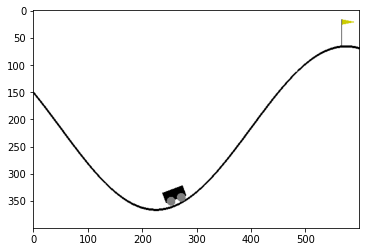

In [5]:
# Visualizar ambiente

env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
plt.show()

## Estados 



En este ambiente, cada estado es definido por la posición horizontal del coche y la velocidad.

In [6]:
env.observation_space?

In [7]:
env.observation_space

Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)

In [8]:
env.observation_space.low

array([-1.2 , -0.07], dtype=float32)

In [9]:
env.observation_space.high

array([0.6 , 0.07], dtype=float32)

## *Acciones*

In [10]:
env.action_space

Discrete(3)

Tres acciones correpondientes a:
* (0) acelerar a la izquierda, 
* (1) acelerar a la derecha, 
* (2) no acelerar.

## El ciclo

### Paso 1

In [11]:
env.reset?

In [21]:
# Paso 1 
state = env.reset()
state

array([-0.42393162,  0.        ])

### Paso 2

In [22]:

act = env.action_space.sample()
act

0

In [25]:
env.step?

### Paso 3

In [24]:
env.step(act)

(array([-0.42566804, -0.00173642]), -1.0, False, {})

## Paso 4

In [26]:
env.render?

## Todo, excepto... 

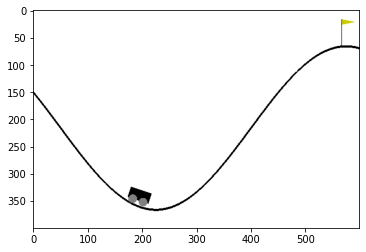

In [27]:
env.reset()  #debe estar al principio de cada episodio
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(100):
  action = env.action_space.sample() # AI escoje aleatoriamente con distribucción uniforme solo para ver las acciones sin aprender las mejores.
  #action = 1

  obs, reward, done, info = env.step(action)

  print("\nTiempo: ", i+1)
  print("accion: ",action)
  print("estado: ", obs)       
  print("premio: ", reward)               
  print("logro: ", done)                     
  
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()

### el aprendizaje

## Referencias

1. Hayes G. Getting Started with Reinforcement Learning and Open AI Gym [Internet]. Medium. 2019 [citado 23 de febrero de 2021]. Disponible en: https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f
2. openai/gym [Internet]. GitHub. [citado 5 de mayo de 2021]. Disponible en: https://github.com/openai/gym
3. OpenAI. Gym: A toolkit for developing and comparing reinforcement learning algorithms [Internet]. [citado 23 de febrero de 2021]. Disponible en: https://gym.openai.com
4. Peterson H. Demystifying Markov Decision Processes [Internet]. Medium. 2020 [citado 23 de febrero de 2021]. Disponible en: https://medium.com/gsi-technology/demystifying-markov-decision-processes-cd8f119aa3d1
5. Pugh DR, Pugh DR. Rendering OpenAI Gym Envs on Binder and Google Colab [Internet]. Stochastic Expatriate Descent. 2020 [citado 23 de febrero de 2021]. Disponible en: https://davidrpugh.github.io/stochastic-expatriate-descent/openai/binder/google-colab/2020/04/16/remote-rendering-gym-envs.html
6.RANA A. Introduction: Reinforcement Learning with OpenAI Gym [Internet]. Medium. 2019 [citado 23 de febrero de 2021]. Disponible en: https://towardsdatascience.com/reinforcement-learning-with-openai-d445c2c687d2
7. Sonawane B. Getting started with OpenAI Gym [Internet]. Medium. 2020 [citado 23 de febrero de 2021]. Disponible en: https://towardsdatascience.com/getting-started-with-openai-gym-d2ac911f5cbc